**Here is the demo for the imitation model of the scikit-learn's LinearRegression**

**This notebook presents you multi-variable linear regression**

In [1]:
from LinearReg import LinReg

In [2]:
help(LinReg)

Help on class LinReg in module LinearReg:

class LinReg(builtins.object)
 |  LinReg(lr=0.01, percent_diff=0.1)
 |  
 |  Linear regression class to predict coefficient and constant of single or multi-variable data.
 |  Parameters
 |  ----------
 |  lr : float, default=0.01
 |      Set the learning rate.
 |  percent_diff : float, default=0.1
 |      Set the difference percent before the epoch stops.
 |  Attributes
 |  ----------
 |  coefs : array of shape (n_features, ) or (n_targets, n_features)
 |      Return slope of the Linear Regression model object.
 |  const : float
 |      Retrun intercept of the Linear Regression model object.
 |  losses : array of shape (min(X, y),)
 |      Return loss progress each epoch of the model object.
 |  epochs : int
 |      Return how many epoch has applied when fit of the model object.
 |  Examples
 |  --------
 |  Input:
 |      import numpy as np
 |      from LinearReg import LinReg
 |      X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
 |      # y

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [6]:
## Comparation of built model and sklearn's LinearRegression model
# Create linear regression object
regr = linear_model.LinearRegression()
myReg = LinReg(lr=1.9, percent_diff=0.000001)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
myReg.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_pred

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [7]:
my_pred = myReg.predict(diabetes_X_test)
my_pred.flatten()

array([197.71683518, 154.66514566, 172.34817991, 111.03612911,
       164.4999815 , 131.2638413 , 259.36564477, 100.51711649,
       116.771567  , 123.8564291 , 218.43299059,  61.08483757,
       132.76945203, 120.49610456,  52.72268454, 193.88743546,
       102.7974455 , 123.97077099, 210.72808284,  51.50492009])

In [8]:
# The coefficients
print('Coefficients: ', regr.coef_)
print('Built Module Coefficients: ', myReg.coefs.flatten())

Coefficients:  [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Built Module Coefficients:  [   0.80721218 -237.17551144  511.83108059  327.35610848 -715.51807002
  414.85847364   58.21395894  171.29178799  706.69839086   76.570645  ]


In [9]:
#The intercept
print('Intercept: ', regr.intercept_)
print('Built Module Intercept: ', myReg.const)

Intercept:  152.76430691633442
Built Module Intercept:  152.75890395667582


In [10]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Built Module Mean squared error: %.2f'
      % myReg.rmse(diabetes_y_test, my_pred.flatten(), unroot=True))

Mean squared error: 2004.57
Built Module Mean squared error: 2001.95


In [11]:
# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(diabetes_y_test, diabetes_y_pred))
print('Built Module Mean absolute error: %.2f'
      % myReg.mae(diabetes_y_test, my_pred.flatten()))

Mean absolute error: 36.61
Built Module Mean absolute error: 36.62


Text(0, 0.5, 'Cost Value')

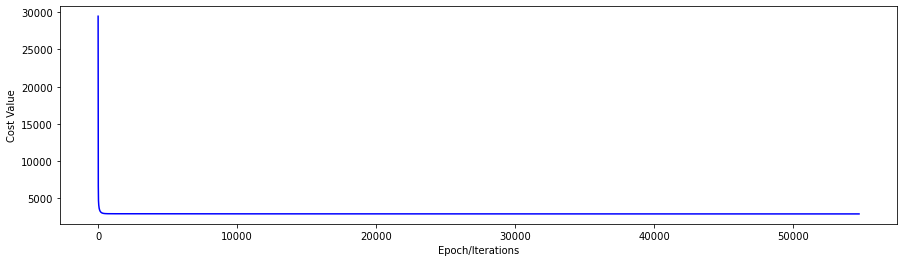

In [12]:
fig = plt.figure(figsize=(15,4))
plt.plot([i for i in range(len(myReg.losses))], myReg.losses, 'b-')
plt.xlabel('Epoch/Iterations')
plt.ylabel('Cost Value')

In [13]:
# Print epochs/iteration has done
myReg.epochs

54725